## data treatment

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datas=np.load(r'\\data\OPENDATA\Instrumentation\Chirality\MChD\MChD-python\run30000.npz')
res=datas['res']
ttlin=datas['ttlin']
tstamps=datas['tstamps']

In [3]:
tstamps[-1]-tstamps[0]

array([182000,  48000,  38000, ...,  37004,  37003,  37004],
      dtype='timedelta64[us]')

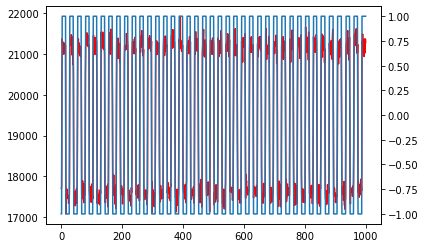

In [4]:
plot(res[840,:1000],'r-')
plt.twinx()
plot(ttlin[:1000]-1,'-')

842

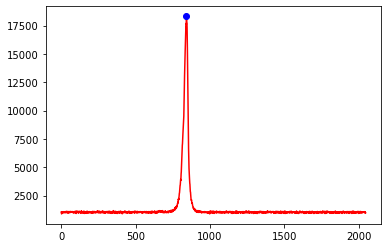

In [5]:
plot(res[:,0],'r')
plot(argmax(res[:,0]),max(res[:,0]),'bo')
argmax(res[:,0])

In [6]:
#getting mean sample frequency
Fs=np.timedelta64(1, 's')/mean(diff(tstamps))
Fs,1/Fs

(26.885334050275574, 0.037195)

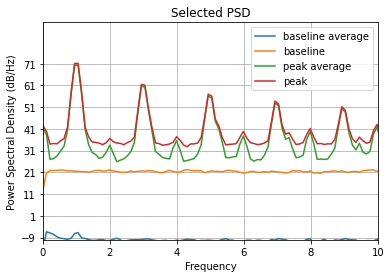

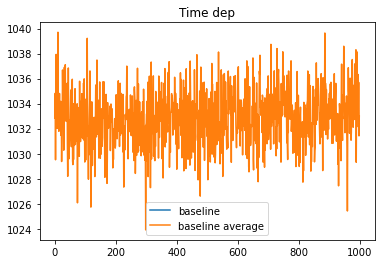

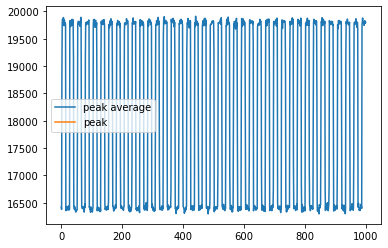

In [7]:
psd(1/2*(mean(res[:500],axis=0) 
        # +        mean(res[2000:,:],axis=0)
        )
    ,Fs=Fs, label='baseline average', detrend='mean');
psd(mean(res[0:1,:],axis=0),Fs=Fs, 
    label='baseline', detrend='mean');
psd(mean(res[830:850,:],axis=0),Fs=Fs,
    label='peak average', detrend='mean');

psd(mean(res[842:843,:],axis=0),Fs=Fs
    , detrend='mean',label='peak');
legend()
title('Selected PSD')
xlim(0,10)
ylim(-10,90)
figure()
title('Time dep')
plot(mean(res[0,:1000],axis=0),label='baseline')
plot(mean(res[0:600,:1000],axis=0),label='baseline average')
legend()
figure()
plot(mean(res[830:850,:1000],axis=0),label='peak average')
plot(mean(res[842,:1000],axis=0),label='peak')
legend()

In [8]:
%timeit mean(res*(ttlin-1),axis=1)

245 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit average(res,weights=(ttlin-1),axis=1)

243 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\UsersPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


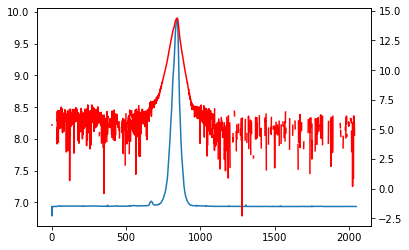

In [10]:
plot(log(mean(res,axis=1)))
twinx()
plot(log(-average(res,weights=(ttlin-1),axis=1)+1000),'r')

(600.0, 1000.0)

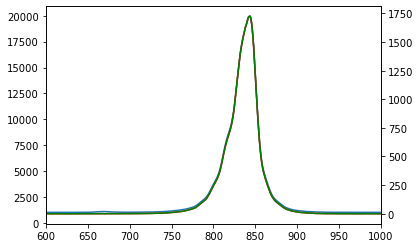

In [11]:
plot(mean(res,axis=1))
twinx()
plot(mean(res*(ttlin-1),axis=1),'r')
plot(-average(res,weights=(ttlin-1),axis=1)/1000,'g')
xlim(600,1000)

(-10.0, 10.0)

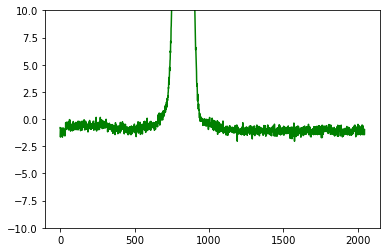

In [12]:
plot(-average(res,weights=(ttlin-1),axis=1)/1000,'g')
ylim(-10,10)

## chuncked calculation

(-100.0, 100.0)

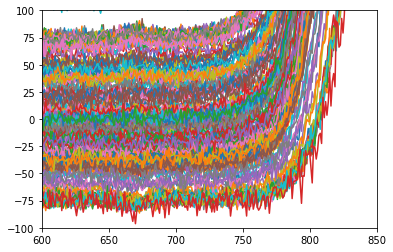

In [13]:

k=14*10
i,j=0,k
while j<30000:
    i+=k
    j+=k
    chunk_res=res[:,i:j]
    chunk_mod=(ttlin-1)[i:j]
    chunk_mean=mean(chunk_res*chunk_mod,axis=1)
    plot(chunk_mean)
xlim(600,850)
ylim(-100,100)

In [14]:
%timeit mean(chunk_res*chunk_mod,axis=1)

156 µs ± 3.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
13*5*0.037


2.405